In [2]:
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# os.chdir("./drive/My Drive/AI_Colab2/VisualAnalysis")

In [3]:
import vgg16
import numpy as np
import cv2
from matplotlib import pyplot as plt
import keras
import tensorflow as tf

Using TensorFlow backend.


In [9]:
vgg16.maybe_download()
vgg = vgg16.VGG16()

In [0]:
def normalize_image(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    return x_norm

def plot_image(image):
    img_norm = normalize_image(image)
    plt.figure(figsize=(4,4))
    plt.axis('off')
    plt.imshow(img_norm, interpolation='nearest')
    plt.show()
    
    
def plot_images(images):
    (m, n) = (len(images)//3, 3)
    fig, axs = plt.subplots(m, n, figsize=(12,8))
    for i, img in enumerate(images):
        ax = axs[i//3, i% 3]
        img = normalize_image(img)
        ax.imshow(img, interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show() 


0
1
2
3
4
5


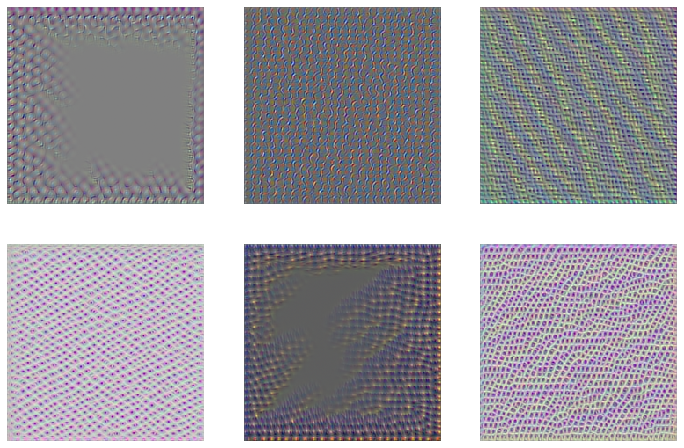

In [77]:
def cost(model, layer_id, feature_id):
    with model.graph.as_default():
        layer = model.get_layer_tensors([layer_id])[0]
        feature_map = layer[:,:,:,feature_id]
        loss = tf.reduce_mean(feature_map)
        return loss

def visual(model, layer_id, feature_id, iters,step_size = 0.5):
    print(feature_id)
    random_image = np.random.uniform(size=(224,224,3)) + 128.0
    with model.graph.as_default():
        loss = cost(vgg,layer_id,feature_id)
        gradient = tf.gradients(loss, model.input)
        
        feed_dict = vgg.create_feed_dict(image=random_image)

        session = tf.Session(graph=vgg.graph)
        init = tf.global_variables_initializer()
        session.run(init)
        run_list = [gradient, loss]
        for i in range(iters):
            grad_val, loss_val = session.run(run_list, feed_dict=feed_dict)
            grad_val = np.array(grad_val).squeeze()
            learning_rate = step_size/(grad_val.max() + 1e-8)
            random_image += learning_rate * grad_val
        return random_image
 

images = []
feature_ids = [0,1,2,3,4,5]
for f_id in feature_ids:
    img = visual(vgg, 5, f_id, 150, 2)
    images.append(img)
plot_images(images)



0
1
2
3
4
5


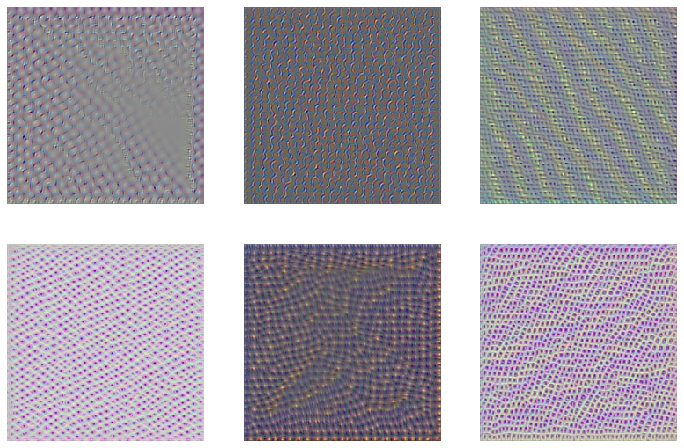

In [79]:
images = []
feature_ids = [0,1,2,3,4,5]
for f_id in feature_ids:
    img = visual(vgg, 5, f_id, 250, 2)
    images.append(img)
plot_images(images)
